In [156]:
import pandas as pd
import import_ipynb
from Neo4j import *
import matplotlib.pyplot as plt
from graph_analyser_v22 import *
from etherscan_scrapper_v3 import *
from louvain_ascendency import *

importing Jupyter notebook from graph_analyser_v22.ipynb


In [25]:
conn = Neo4jConnection(uri="bolt://localhost:7687", 
                       user="neo4j",              
                       pwd="dai")

In [157]:
dai_analyser = graph_analyser(conn, 'DAI')

DAI


In [99]:
nodes = dai_analyser.find_shortest_path('0x28c6c06298d514db089934071355e5743bf21d60', '0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c')
print(nodes)

['0x28c6c06298d514db089934071355e5743bf21d60', '0xa030ad671e4a209a3ddcb9d1f5061bc804d017aa', '0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c']


In [101]:
dai_analyser.perform_analysis(0.01, 1)
dai_analyser.calculate_pageRank_centrality_for_all_nodes()
#print(dai_analyser.pageRank_centrality_score_by_node)

louvain_ascendency.ipynb:104: RuntimeWarning: invalid value encountered in double_scalars
  "        \n",
mixer_ascendency.ipynb:44: RuntimeWarning: invalid value encountered in double_scalars
  "            \n",
mixer_ascendency.ipynb:59: RuntimeWarning: invalid value encountered in double_scalars
  "class blockchain:\n",


In [103]:
dai_analyser.calculate_pageRank_centrality_for_all_nodes()
address_owners = {}
url_start = "https://etherscan.io/address/"
for index, row in dai_analyser.pageRank_centrality_score_by_node.head(30).iterrows():
    address = row["address"]
    parser = etherscanParser("https://etherscan.io/address/" + address)
    address_owners[address] = {}
    address_owners[address]['href'] = parser.get_labels_through_href() 
    address_owners[address]['title'] = parser.get_address_name() 
print(address_owners)

{'0x28c6c06298d514db089934071355e5743bf21d60': {'href': 'binance exchange ', 'title': 'Address 0x28c6c06298d514db089934071355e5743bf21d60'}, '0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c': {'href': 'sushiswap ', 'title': 'SushiSwap OHMDAI 2'}, '0x503828976d22510aad0201ac7ec88293211d23da': {'href': 'coinbase ', 'title': 'Address 0x503828976d22510aad0201ac7ec88293211d23da'}, '0x74de5d4fcbf63e00296fd95d33236b9794016631': {'href': '', 'title': 'Contract Address 0x74de5d4fcbf63e00296fd95d33236b9794016631'}, '0xa478c2975ab1ea89e8196811f51a7b7ade33eb11': {'href': 'uniswap ', 'title': 'Uniswap V2 DAI 2'}, '0xfd3dfb524b2da40c8a6d703c62be36b5d8540626': {'href': '', 'title': 'Contract Address 0xfd3dfb524b2da40c8a6d703c62be36b5d8540626'}, '0x06da0fd433c1a5d7a4faa01111c044910a184553': {'href': 'sushiswap ', 'title': 'SushiSwap USDT'}, '0x0000000000000000000000000000000000000000': {'href': 'blocked ', 'title': 'Address 0x0000000000000000000000000000000000000000'}, '0xc3d03e4f041fd4cd388c549ee2a29a9e50

In [108]:
shortest_paths_df = pd.DataFrame(columns = address_owners.keys(), index = address_owners.keys())
    
for address1 in address_owners:
    for address2 in address_owners:
        if(address1 == address2):
            shortest_paths_df[address1][address2] = 0
        else:
            shortest_path = dai_analyser.find_shortest_path(address1, address2)
            if(len(shortest_path) == 0):
                shortest_paths_df[address1][address2] = 0
            else:
                shortest_paths_df[address1][address2] = len(shortest_path) - 1
        
#print(shortest_paths_df.head(30))
df_copy = shortest_paths_df
print(df_copy.to_numpy())

[[0 0 2 3 0 5 0 3 0 3 2 0 0 0 2 0 1 4 0 4 0 3 2 5 0 4 0 0 2 3]
 [2 0 2 5 0 7 0 3 0 5 4 0 0 0 4 0 3 6 0 3 0 2 4 4 0 6 0 0 4 2]
 [3 0 0 6 0 8 0 3 0 6 5 0 0 0 3 0 4 7 0 4 0 3 2 3 0 7 0 0 2 2]
 [4 0 2 0 0 2 0 2 0 2 6 0 0 0 5 0 5 1 0 3 0 2 3 2 0 3 0 0 4 2]
 [5 0 2 2 0 4 0 3 0 1 7 0 0 0 2 0 6 3 0 2 0 2 4 4 0 2 0 0 4 4]
 [4 0 4 7 0 0 0 6 0 7 6 0 0 0 6 0 5 1 0 3 0 2 4 4 0 8 0 0 6 6]
 [5 0 4 4 2 1 0 5 0 3 7 0 0 0 4 1 6 2 0 4 0 3 5 5 0 4 0 0 6 6]
 [2 0 4 5 0 7 0 0 0 5 4 0 0 0 4 0 3 6 0 5 0 2 4 4 0 6 0 0 4 5]
 [4 0 2 2 0 4 0 2 0 1 6 0 0 0 4 0 5 3 0 4 0 4 4 4 0 2 0 0 4 4]
 [4 0 3 1 0 3 0 2 0 0 6 0 0 0 3 0 5 2 0 3 0 3 4 3 0 1 0 0 5 3]
 [5 0 3 1 0 3 0 3 0 2 0 0 0 0 5 0 6 2 0 4 0 3 4 3 0 3 0 0 5 3]
 [2 0 2 5 0 7 0 5 0 5 4 0 0 0 4 0 3 6 0 4 0 5 2 3 0 6 0 0 4 4]
 [5 0 3 3 0 5 0 3 1 2 7 0 0 0 5 0 6 4 0 5 0 5 5 5 0 3 0 0 5 5]
 [6 0 3 3 1 5 0 4 0 2 8 0 0 0 3 0 7 4 0 3 0 3 5 5 0 3 0 0 5 5]
 [3 0 2 6 0 8 0 5 0 6 5 0 0 0 0 0 4 7 0 2 0 5 2 5 0 7 0 0 4 2]
 [6 0 3 3 1 5 0 4 0 2 8 0 0 0 3 0 7 4 0 3 0 3 5 5 0 3 0

In [115]:
np_shortest = df_copy.to_numpy()
all_shortest = np_shortest.flatten()
mean = np.mean(all_shortest)
sd = np.std(all_shortest)
median = np.median(all_shortest)

print("mean: ", mean, " sd: ", sd, " median:", median)

mean:  2.3555555555555556  sd:  2.6390701692120113  median: 2.0


In [118]:
# cleaning
for address in address_owners:
    if "Address" in address_owners[address]['title'] or 'Ethereum Accoun' in address_owners[address]['title']:
        address_owners[address]['title'] = "None"
print(address_owners)

{'0x28c6c06298d514db089934071355e5743bf21d60': {'href': 'binance exchange ', 'title': 'None'}, '0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c': {'href': 'sushiswap ', 'title': 'SushiSwap OHMDAI 2'}, '0x503828976d22510aad0201ac7ec88293211d23da': {'href': 'coinbase ', 'title': 'None'}, '0x74de5d4fcbf63e00296fd95d33236b9794016631': {'href': '', 'title': 'None'}, '0xa478c2975ab1ea89e8196811f51a7b7ade33eb11': {'href': 'uniswap ', 'title': 'Uniswap V2 DAI 2'}, '0xfd3dfb524b2da40c8a6d703c62be36b5d8540626': {'href': '', 'title': 'None'}, '0x06da0fd433c1a5d7a4faa01111c044910a184553': {'href': 'sushiswap ', 'title': 'SushiSwap USDT'}, '0x0000000000000000000000000000000000000000': {'href': 'blocked ', 'title': 'None'}, '0xc3d03e4f041fd4cd388c549ee2a29a9e5075882f': {'href': 'sushiswap ', 'title': 'SushiSwap DAI'}, '0x0000006daea1723962647b7e189d311d757fb793': {'href': '', 'title': 'Wintermute'}, '0xa5d07e978398eb1715056d3ca5cb31035c02fdad': {'href': '', 'title': 'None'}, '0x2a549b4af9ec39b03142da6dc3

In [119]:
print("address connected by one edge")
for address1 in address_owners:
    for address2 in address_owners:
        if(shortest_paths_df[address1][address2] == 1):
            print(address1, address2)
            print("address1 owner:")
            print(address_owners[address1])
            print("address2 owner:")
            print(address_owners[address2])    
            print("-----------------------------------------------------")
            

address connected by one edge
0x74de5d4fcbf63e00296fd95d33236b9794016631 0x0000006daea1723962647b7e189d311d757fb793
address1 owner:
{'href': '', 'title': 'None'}
address2 owner:
{'href': '', 'title': 'Wintermute'}
-----------------------------------------------------
0x74de5d4fcbf63e00296fd95d33236b9794016631 0xa5d07e978398eb1715056d3ca5cb31035c02fdad
address1 owner:
{'href': '', 'title': 'None'}
address2 owner:
{'href': '', 'title': 'None'}
-----------------------------------------------------
0xa478c2975ab1ea89e8196811f51a7b7ade33eb11 0xd1a1a62a01db5d40f7de05142c29ed74dacb0779
address1 owner:
{'href': 'uniswap ', 'title': 'Uniswap V2 DAI 2'}
address2 owner:
{'href': '', 'title': 'None'}
-----------------------------------------------------
0xa478c2975ab1ea89e8196811f51a7b7ade33eb11 0xff26d7d5710b916b62c8317c9228c06a38446203
address1 owner:
{'href': 'uniswap ', 'title': 'Uniswap V2 DAI 2'}
address2 owner:
{'href': '', 'title': 'None'}
--------------------------------------------------

In [120]:
print("address connected by two edges")
for address1 in address_owners:
    for address2 in address_owners:
        if(shortest_paths_df[address1][address2] == 2):
            print(address1, address2)
            print("address1 owner:")
            print(address_owners[address1])
            print("address2 owner:")
            print(address_owners[address2])    
            print("-----------------------------------------------------")
            

address connected by two edges
0x28c6c06298d514db089934071355e5743bf21d60 0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c
address1 owner:
{'href': 'binance exchange ', 'title': 'None'}
address2 owner:
{'href': 'sushiswap ', 'title': 'SushiSwap OHMDAI 2'}
-----------------------------------------------------
0x28c6c06298d514db089934071355e5743bf21d60 0x0000000000000000000000000000000000000000
address1 owner:
{'href': 'binance exchange ', 'title': 'None'}
address2 owner:
{'href': 'blocked ', 'title': 'None'}
-----------------------------------------------------
0x28c6c06298d514db089934071355e5743bf21d60 0x2a549b4af9ec39b03142da6dc32221fc390b5533
address1 owner:
{'href': 'binance exchange ', 'title': 'None'}
address2 owner:
{'href': 'blockfi ', 'title': 'BlockFi 3'}
-----------------------------------------------------
0x28c6c06298d514db089934071355e5743bf21d60 0x5f65f7b609678448494de4c87521cdf6cef1e932
address1 owner:
{'href': 'binance exchange ', 'title': 'None'}
address2 owner:
{'href': 'ge

In [158]:
# find all shortests paths for all pairs
l =[]
shortest_paths_of_top_nodes = np.array(l)
for address1 in address_owners:
    for address2 in address_owners:
        if(address1 != address2 and shortest_paths_df[address1][address2] > 0):
            shortest_paths_of_top_nodes = np.append(shortest_paths_of_top_nodes, dai_analyser.find_all_shortest_paths(address1, address2))

shortest_paths_of_top_nodes_flat = shortest_paths_of_top_nodes.flatten()


In [160]:
print(shortest_paths_of_top_nodes_flat.shape)
unique,pos = np.unique(shortest_paths_of_top_nodes_flat,return_inverse=True)
counts = np.bincount(pos)
print(unique[np.argmax(counts)])

(10372,)
0x503828976d22510aad0201ac7ec88293211d23da


In [9]:
print(analyser.centrality_score_by_node)

                                         address  degreeCentrality
0     0x503828976d22510aad0201ac7ec88293211d23da             193.0
1     0x60594a405d53811d3bc4766596efd80fd545a270              87.0
2     0x6c6bc977e13df9b0de53b251522280bb72383700              54.0
3     0x0075f029648ffbd2026a7df1e9eff27ebc90ca65              50.0
4     0x0000000000000000000000000000000000000000              49.0
...                                          ...               ...
3789  0xae05570e0a22e74458dbcd6c79ebd7432cc71f33               0.0
3790  0xcb6338a15c6bc7b42cd740d6bcc0806b5cd93ca3               0.0
3791  0x89920ecc950dbe5f6bd764e79bdc1957448f1109               0.0
3792  0xb9b1fea4824dd6908c064def7409ef89a6d31f8c               0.0
3793  0xe9370e68472e1d64c1bae41f906c3e9189130657               0.0

[3794 rows x 2 columns]


In [65]:
highest_centrality = analyser.centrality_score_by_node.nlargest(15, "degreeCentrality")
for highest in highest_centrality.iterrows():
    print("community id: ", analyser.get_node_community_id( highest[1][0])[0], "  address:", highest[1][0] )

community id:  14   address: 0x503828976d22510aad0201ac7ec88293211d23da
community id:  523   address: 0x60594a405d53811d3bc4766596efd80fd545a270
community id:  3   address: 0x6c6bc977e13df9b0de53b251522280bb72383700
community id:  238   address: 0x0075f029648ffbd2026a7df1e9eff27ebc90ca65
community id:  189   address: 0x0000000000000000000000000000000000000000
community id:  189   address: 0x40ec5b33f54e0e8a33a975908c5ba1c14e5bbbdf
community id:  3   address: 0x6f48eca74b38d2936b02ab603ff4e36a6c0e3a77
community id:  523   address: 0x28c6c06298d514db089934071355e5743bf21d60
community id:  523   address: 0x21a31ee1afc51d94c2efccaa2092ad1028285549
community id:  523   address: 0xdfd5293d8e347dfe59e90efd55b2956a1343963d
community id:  523   address: 0x5f65f7b609678448494de4c87521cdf6cef1e932
community id:  523   address: 0xd3e52099a6a48f132cb23b1364b7dee212d862f6
community id:  189   address: 0x5d3a536e4d6dbd6114cc1ead35777bab948e3643
community id:  189   address: 0xe82906b6b1b04f631d126c97

Average Mutual Information


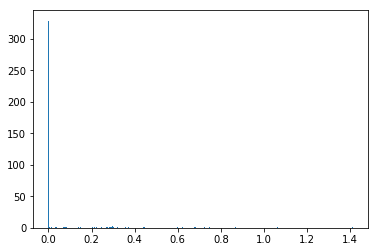

Development capacity


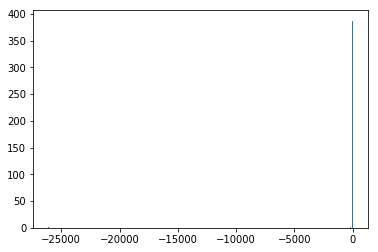

Ascendency


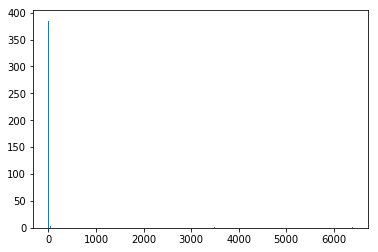

Redundancy


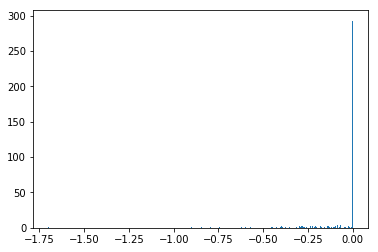

In [30]:
for count, metric in enumerate(all_metrics):
    print(metric_names[count])
    plt.hist(all_metrics[count], bins=len(all_metrics[count]))
    plt.show()

Average Mutual Information


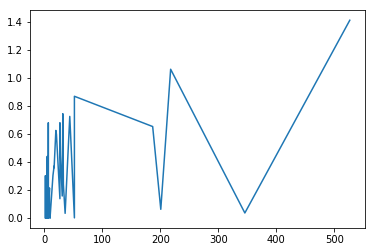

Development capacity


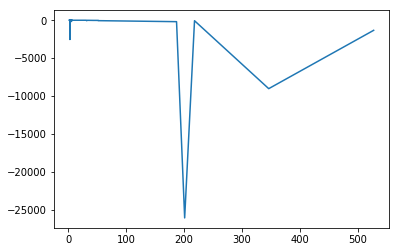

Ascendency


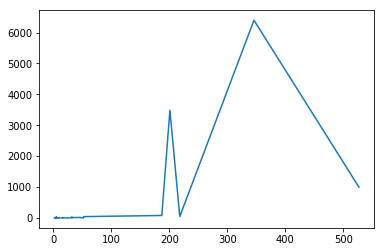

Redundancy


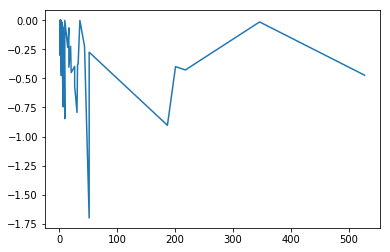

In [31]:

sorted_indicies = np.argsort(community_sizes)
community_sizes = community_sizes[sorted_indicies]

for count, metric in enumerate(all_metrics):
    print(metric_names[count])
    sorted_metric = all_metrics[count][sorted_indicies]
    plt.plot(community_sizes, sorted_metric)
    plt.show()

Average Mutual Information


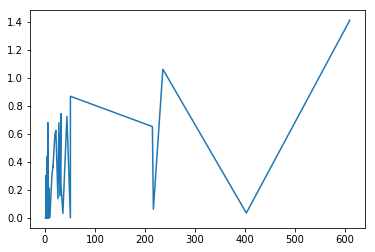

Development capacity


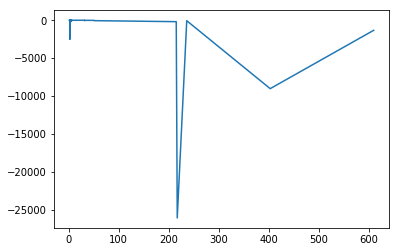

Ascendency


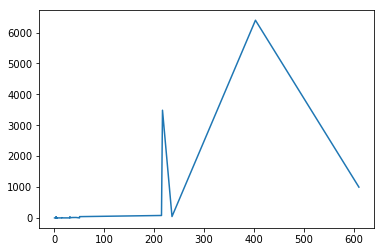

Redundancy


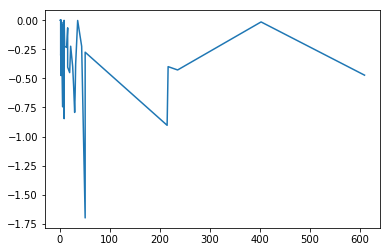

In [32]:
sorted_indicies = np.argsort(number_of_edges)
number_of_edges = number_of_edges[sorted_indicies]

for count, metric in enumerate(all_metrics):
    print(metric_names[count])
    sorted_metric = all_metrics[count][sorted_indicies]
    plt.plot(number_of_edges, sorted_metric)
    plt.show()